In [7]:
import pandas as pd
import numpy as np
import klib

# PART1: 

• DOMAIN: Electronics and Telecommunication
    
• CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting
informative signals. Company wants to build a machine learning model which can help the company to predict the
equipment’s signal quality using various parameters.

• DATA DESCRIPTION: The data set contains information on various signal tests performed:
        
1. Parameters: Various measurable signal parameters.
    
2. Signal_Quality: Final signal strength or quality
    
• PROJECT OBJECTIVE: The need is to build a regressor which can use these parameters to determine the signal strength or
quality [as number].

Steps and tasks: [ Total Score: 10 points]
    
1. Import data.

2. Data analysis & visualisation

• Perform relevant and detailed statistical analysis on the data.

• Perform relevant and detailed uni, bi and multi variate analysis.

Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better
analysis. Create your own features if required. Be highly experimental and analytical here to find relevant hidden patterns.

3. Design, train, tune and test a neural network regressor.

Hint: Use best approach to refine and tune the data or the model. Be highly experimental here.
    
4. Pickle the model for future use.

In [55]:
df = pd.read_csv("Part- 1,2&3 - Signal.csv")

In [4]:
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.Signal_Strength.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

In [8]:
klib.missingval_plot(df)

No missing values found in the dataset.


Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

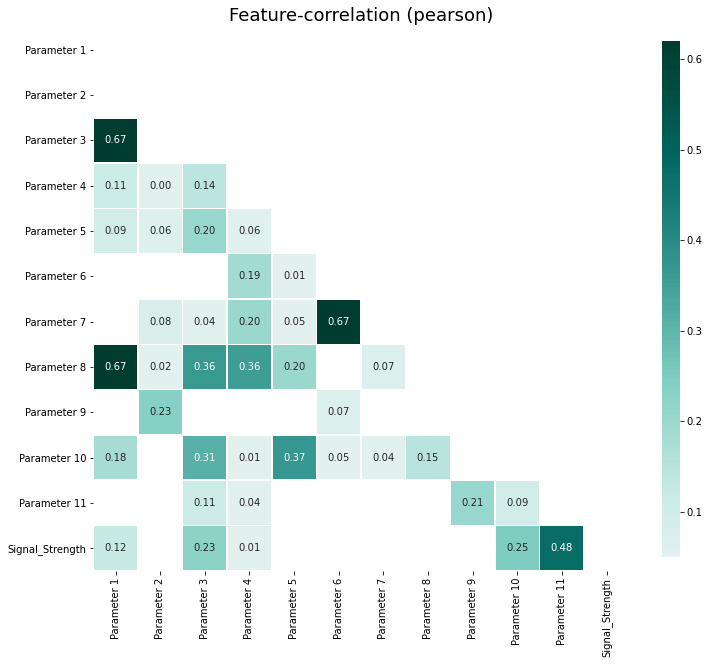

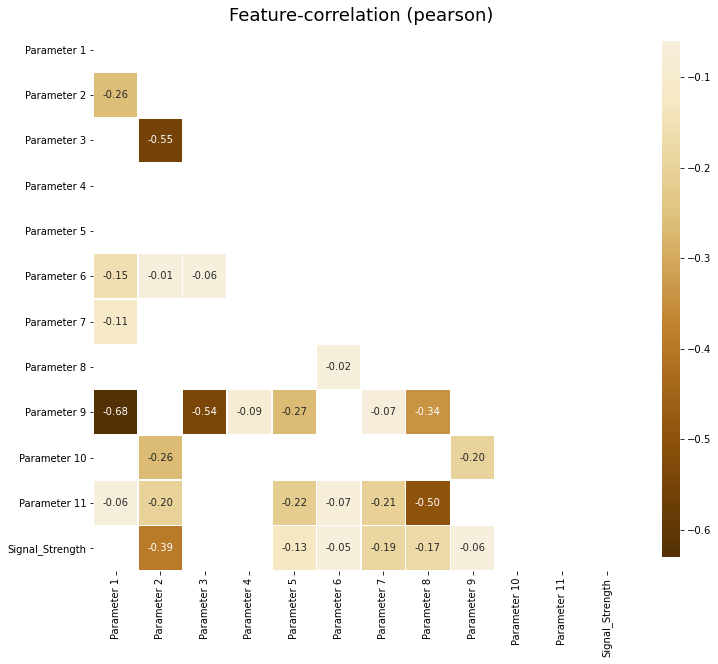

In [9]:
klib.corr_plot(df, split='pos') # displaying only positive correlations, other settings include threshold, cmap...
klib.corr_plot(df, split='neg') # displaying only negative correlations

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

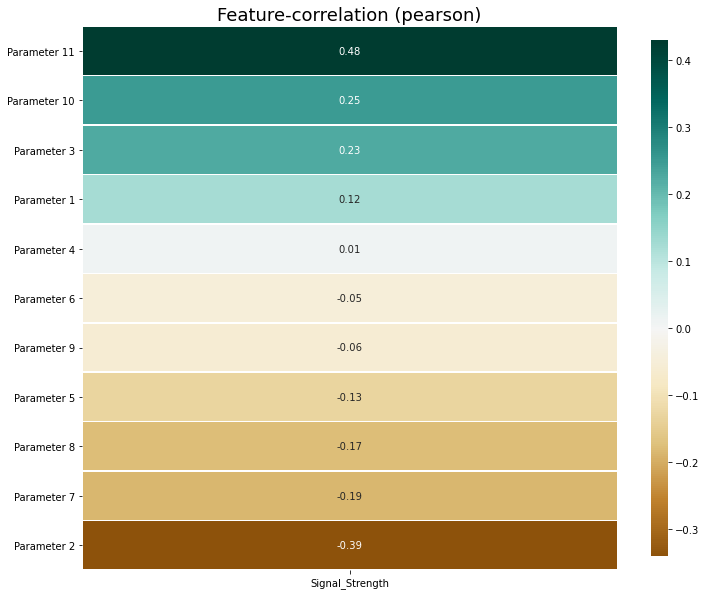

In [10]:
klib.corr_plot(df, target='Signal_Strength') # default representation of correlations with the feature column


<AxesSubplot:xlabel='Signal_Strength', ylabel='Density'>

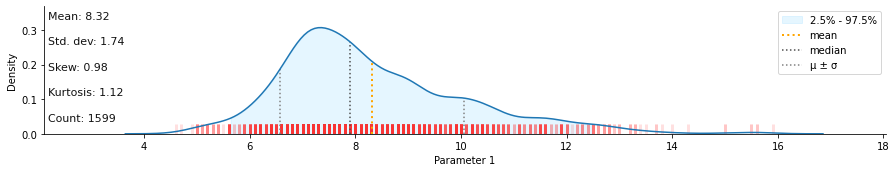

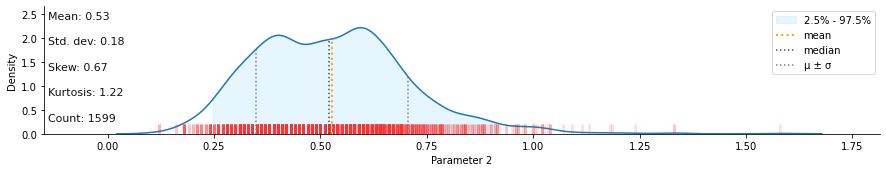

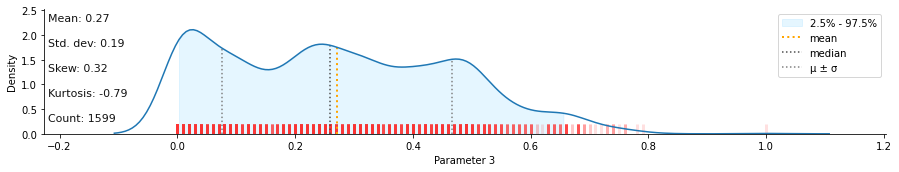

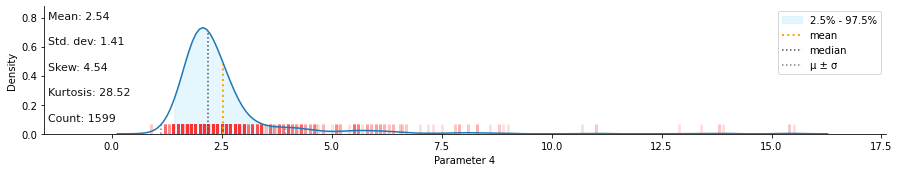

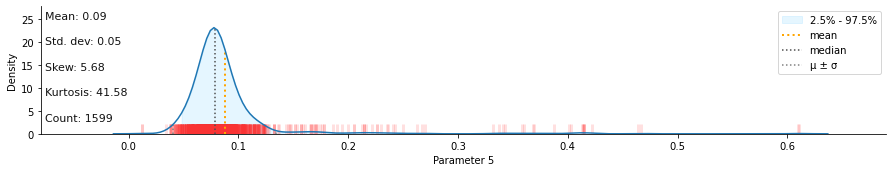

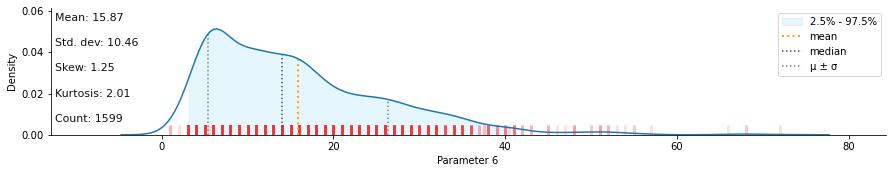

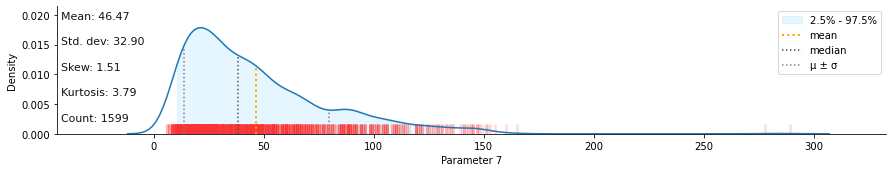

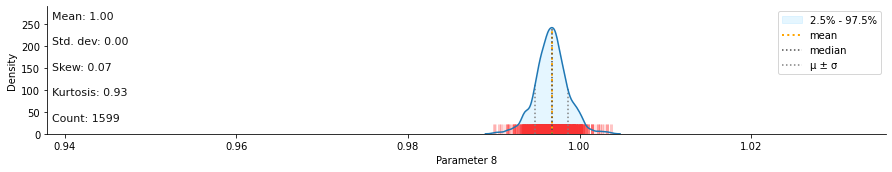

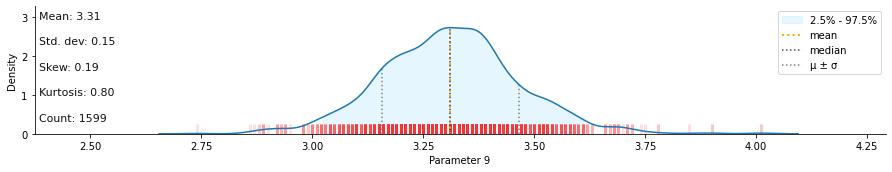

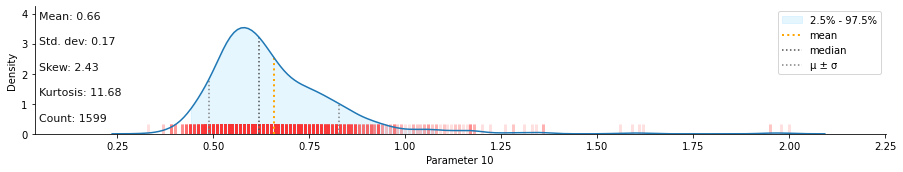

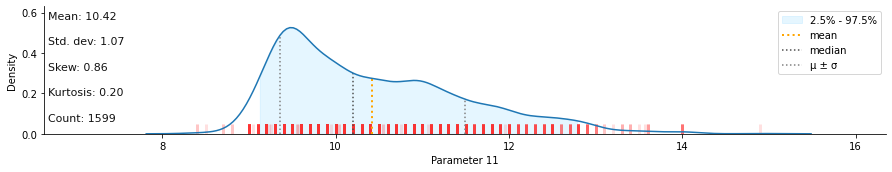

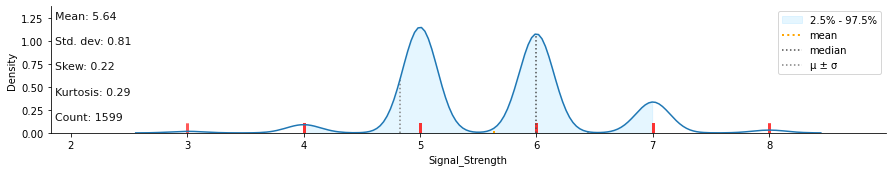

In [11]:
klib.dist_plot(df) # default representation of a distribution plot, other settings include fill_range, histogram, ...


In [14]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [13]:
pip install tensorflow

     |████████████████████████████████| 207.1 MB 1.5 MB/s eta 0:00:01    |███▉                            | 24.7 MB 1.2 MB/s eta 0:02:33
     |████████████████████████████████| 57 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 4.2 MB/s eta 0:00:011
     |████████████████████████████████| 1.0 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 463 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 4

In [18]:
df.shape

(1599, 12)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
X = df.drop('Signal_Strength',axis=1)
y = df.Signal_Strength

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(11, activation = 'relu', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 11, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 11, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

In [31]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')


In [32]:
model.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
112/112 [==============================] - 0s 595us/step - loss: 25.2418
Epoch 2/100
112/112 [==============================] - 0s 545us/step - loss: 5.3686
Epoch 3/100
112/112 [==============================] - 0s 555us/step - loss: 2.5151
Epoch 4/100
112/112 [==============================] - 0s 547us/step - loss: 1.9050
Epoch 5/100
112/112 [==============================] - 0s 557us/step - loss: 1.5559
Epoch 6/100
112/112 [==============================] - 0s 572us/step - loss: 1.2981
Epoch 7/100
112/112 [==============================] - 0s 553us/step - loss: 1.1064
Epoch 8/100
112/112 [==============================] - 0s 549us/step - loss: 0.9715
Epoch 9/100
112/112 [==============================] - 0s 580us/step - loss: 0.8554
Epoch 10/100
112/112 [==============================] - 0s 584us/step - loss: 0.7651
Epoch 11/100
112/112 [==============================] - 0s 569us/step - loss: 0.6916
Epoch 12/100
112/112 [==============================] - 0s 557us/step - l

In [33]:
y_pred = model.predict(X_test)


In [50]:
from sklearn.metrics import r2_score

score_r = r2_score(y_test,y_pred)
print(score_r)

0.30582615807457203


# Second Approach

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
import matplotlib.pyplot as plt
from tensorflow import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from sklearn.model_selection import StratifiedKFold
%matplotlib inline
#Test Train Split
from sklearn.model_selection import train_test_split
#Feature Scaling library
from sklearn.preprocessing import StandardScaler
#import pickle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
import tensorflow as tf

In [63]:
mydata = df

/Users/rajeshmore/Rajesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


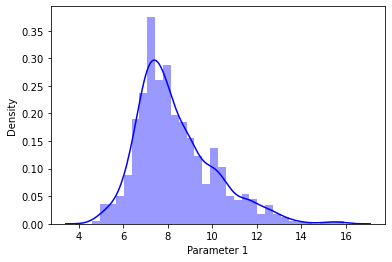

/Users/rajeshmore/Rajesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Distribution of  Parameter 1
Mean is: 8.319637273295838
Median is: 7.9
Mode is: 0    7.2
dtype: float64
Standard deviation is: 1.7410963181277006
Skewness is: 0.9827514413284587
Maximum is: 15.9
Minimum is: 4.6


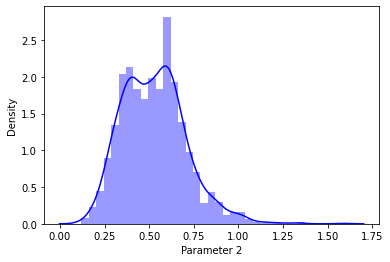

Distribution of  Parameter 2
Mean is: 0.5278205128205131
Median is: 0.52
Mode is: 0    0.6
dtype: float64
Standard deviation is: 0.17905970415353498
Skewness is: 0.6715925723840199
Maximum is: 1.58
Minimum is: 0.12


/Users/rajeshmore/Rajesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


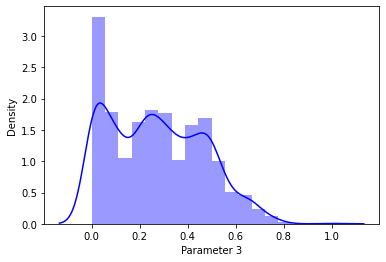

Distribution of  Parameter 3
Mean is: 0.2709756097560964
Median is: 0.26
Mode is: 0    0.0
dtype: float64
Standard deviation is: 0.19480113740531785
Skewness is: 0.3183372952546368
Maximum is: 1.0
Minimum is: 0.0


/Users/rajeshmore/Rajesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


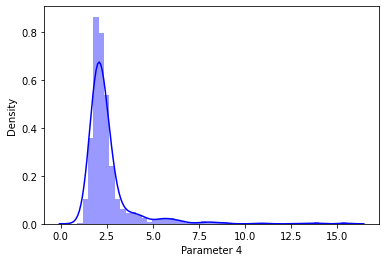

Distribution of  Parameter 4
Mean is: 2.5388055034396517
Median is: 2.2
Mode is: 0    2.0
dtype: float64
Standard deviation is: 1.4099280595072805
Skewness is: 4.54065542590319
Maximum is: 15.5
Minimum is: 0.9


/Users/rajeshmore/Rajesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


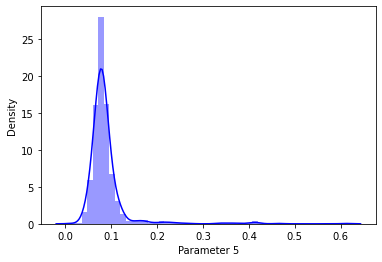

Distribution of  Parameter 5
Mean is: 0.08746654158849257
Median is: 0.079
Mode is: 0    0.08
dtype: float64
Standard deviation is: 0.047065302010090154
Skewness is: 5.680346571971724
Maximum is: 0.611
Minimum is: 0.012


/Users/rajeshmore/Rajesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


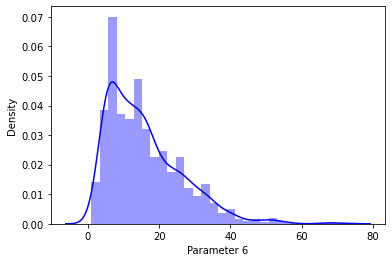

Distribution of  Parameter 6
Mean is: 15.874921826141339
Median is: 14.0
Mode is: 0    6.0
dtype: float64
Standard deviation is: 10.46015696980973
Skewness is: 1.250567293314441
Maximum is: 72.0
Minimum is: 1.0


/Users/rajeshmore/Rajesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


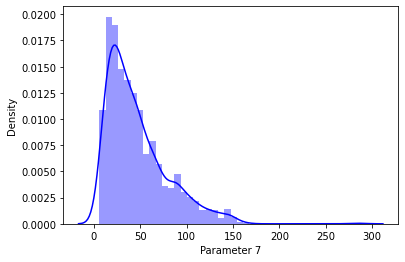

Distribution of  Parameter 7
Mean is: 46.46779237023139
Median is: 38.0
Mode is: 0    28.0
dtype: float64
Standard deviation is: 32.89532447829901
Skewness is: 1.515531257594554
Maximum is: 289.0
Minimum is: 6.0


/Users/rajeshmore/Rajesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


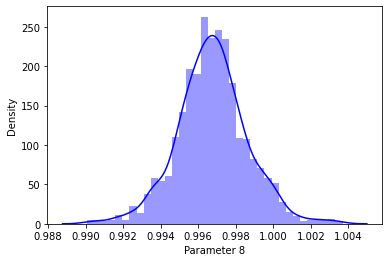

Distribution of  Parameter 8
Mean is: 0.9967466791744831
Median is: 0.99675
Mode is: 0    0.9972
dtype: float64
Standard deviation is: 0.0018873339538425559
Skewness is: 0.07128766294927483
Maximum is: 1.00369
Minimum is: 0.99007


/Users/rajeshmore/Rajesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


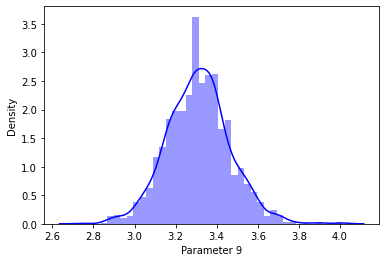

Distribution of  Parameter 9
Mean is: 3.311113195747343
Median is: 3.31
Mode is: 0    3.3
dtype: float64
Standard deviation is: 0.15438646490354266
Skewness is: 0.19368349811284427
Maximum is: 4.01
Minimum is: 2.74


/Users/rajeshmore/Rajesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


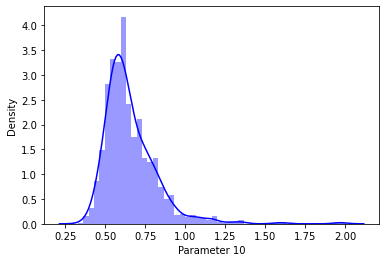

Distribution of  Parameter 10
Mean is: 0.6581488430268921
Median is: 0.62
Mode is: 0    0.6
dtype: float64
Standard deviation is: 0.16950697959010977
Skewness is: 2.4286723536602945
Maximum is: 2.0
Minimum is: 0.33


/Users/rajeshmore/Rajesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


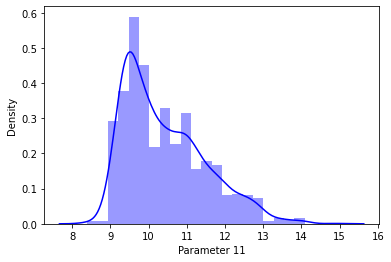

Distribution of  Parameter 11
Mean is: 10.422983114446502
Median is: 10.2
Mode is: 0    9.5
dtype: float64
Standard deviation is: 1.0656675818563965
Skewness is: 0.8608288069184189
Maximum is: 14.9
Minimum is: 8.4


/Users/rajeshmore/Rajesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


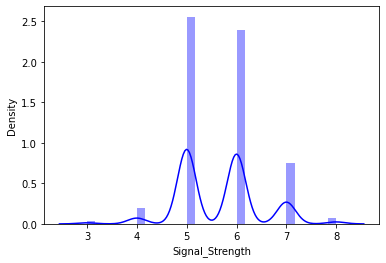

Distribution of  Signal_Strength
Mean is: 5.6360225140712945
Median is: 6.0
Mode is: 0    5
dtype: int64
Standard deviation is: 0.8075694397347023
Skewness is: 0.21780157547366327
Maximum is: 8
Minimum is: 3


In [64]:
import seaborn as sns
# studying the distribution of continuous attributes
cols = list(df)
for i in np.arange(len(cols)):
    sns.distplot(df[cols[i]], color='blue')
    #plt.xlabel('Experience')
    plt.show()
    print('Distribution of ',cols[i])
    print('Mean is:',df[cols[i]].mean())
    print('Median is:',df[cols[i]].median())
    print('Mode is:',df[cols[i]].mode())
    print('Standard deviation is:',mydata[cols[i]].std())
    print('Skewness is:',df[cols[i]].skew())
    print('Maximum is:',df[cols[i]].max())
    print('Minimum is:',df[cols[i]].min())

/Users/rajeshmore/Rajesh/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


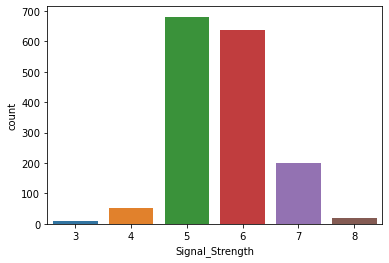

In [65]:
sns.countplot(mydata['Signal_Strength'])    # Distibution of the column 'Signal_Strength'
plt.show()

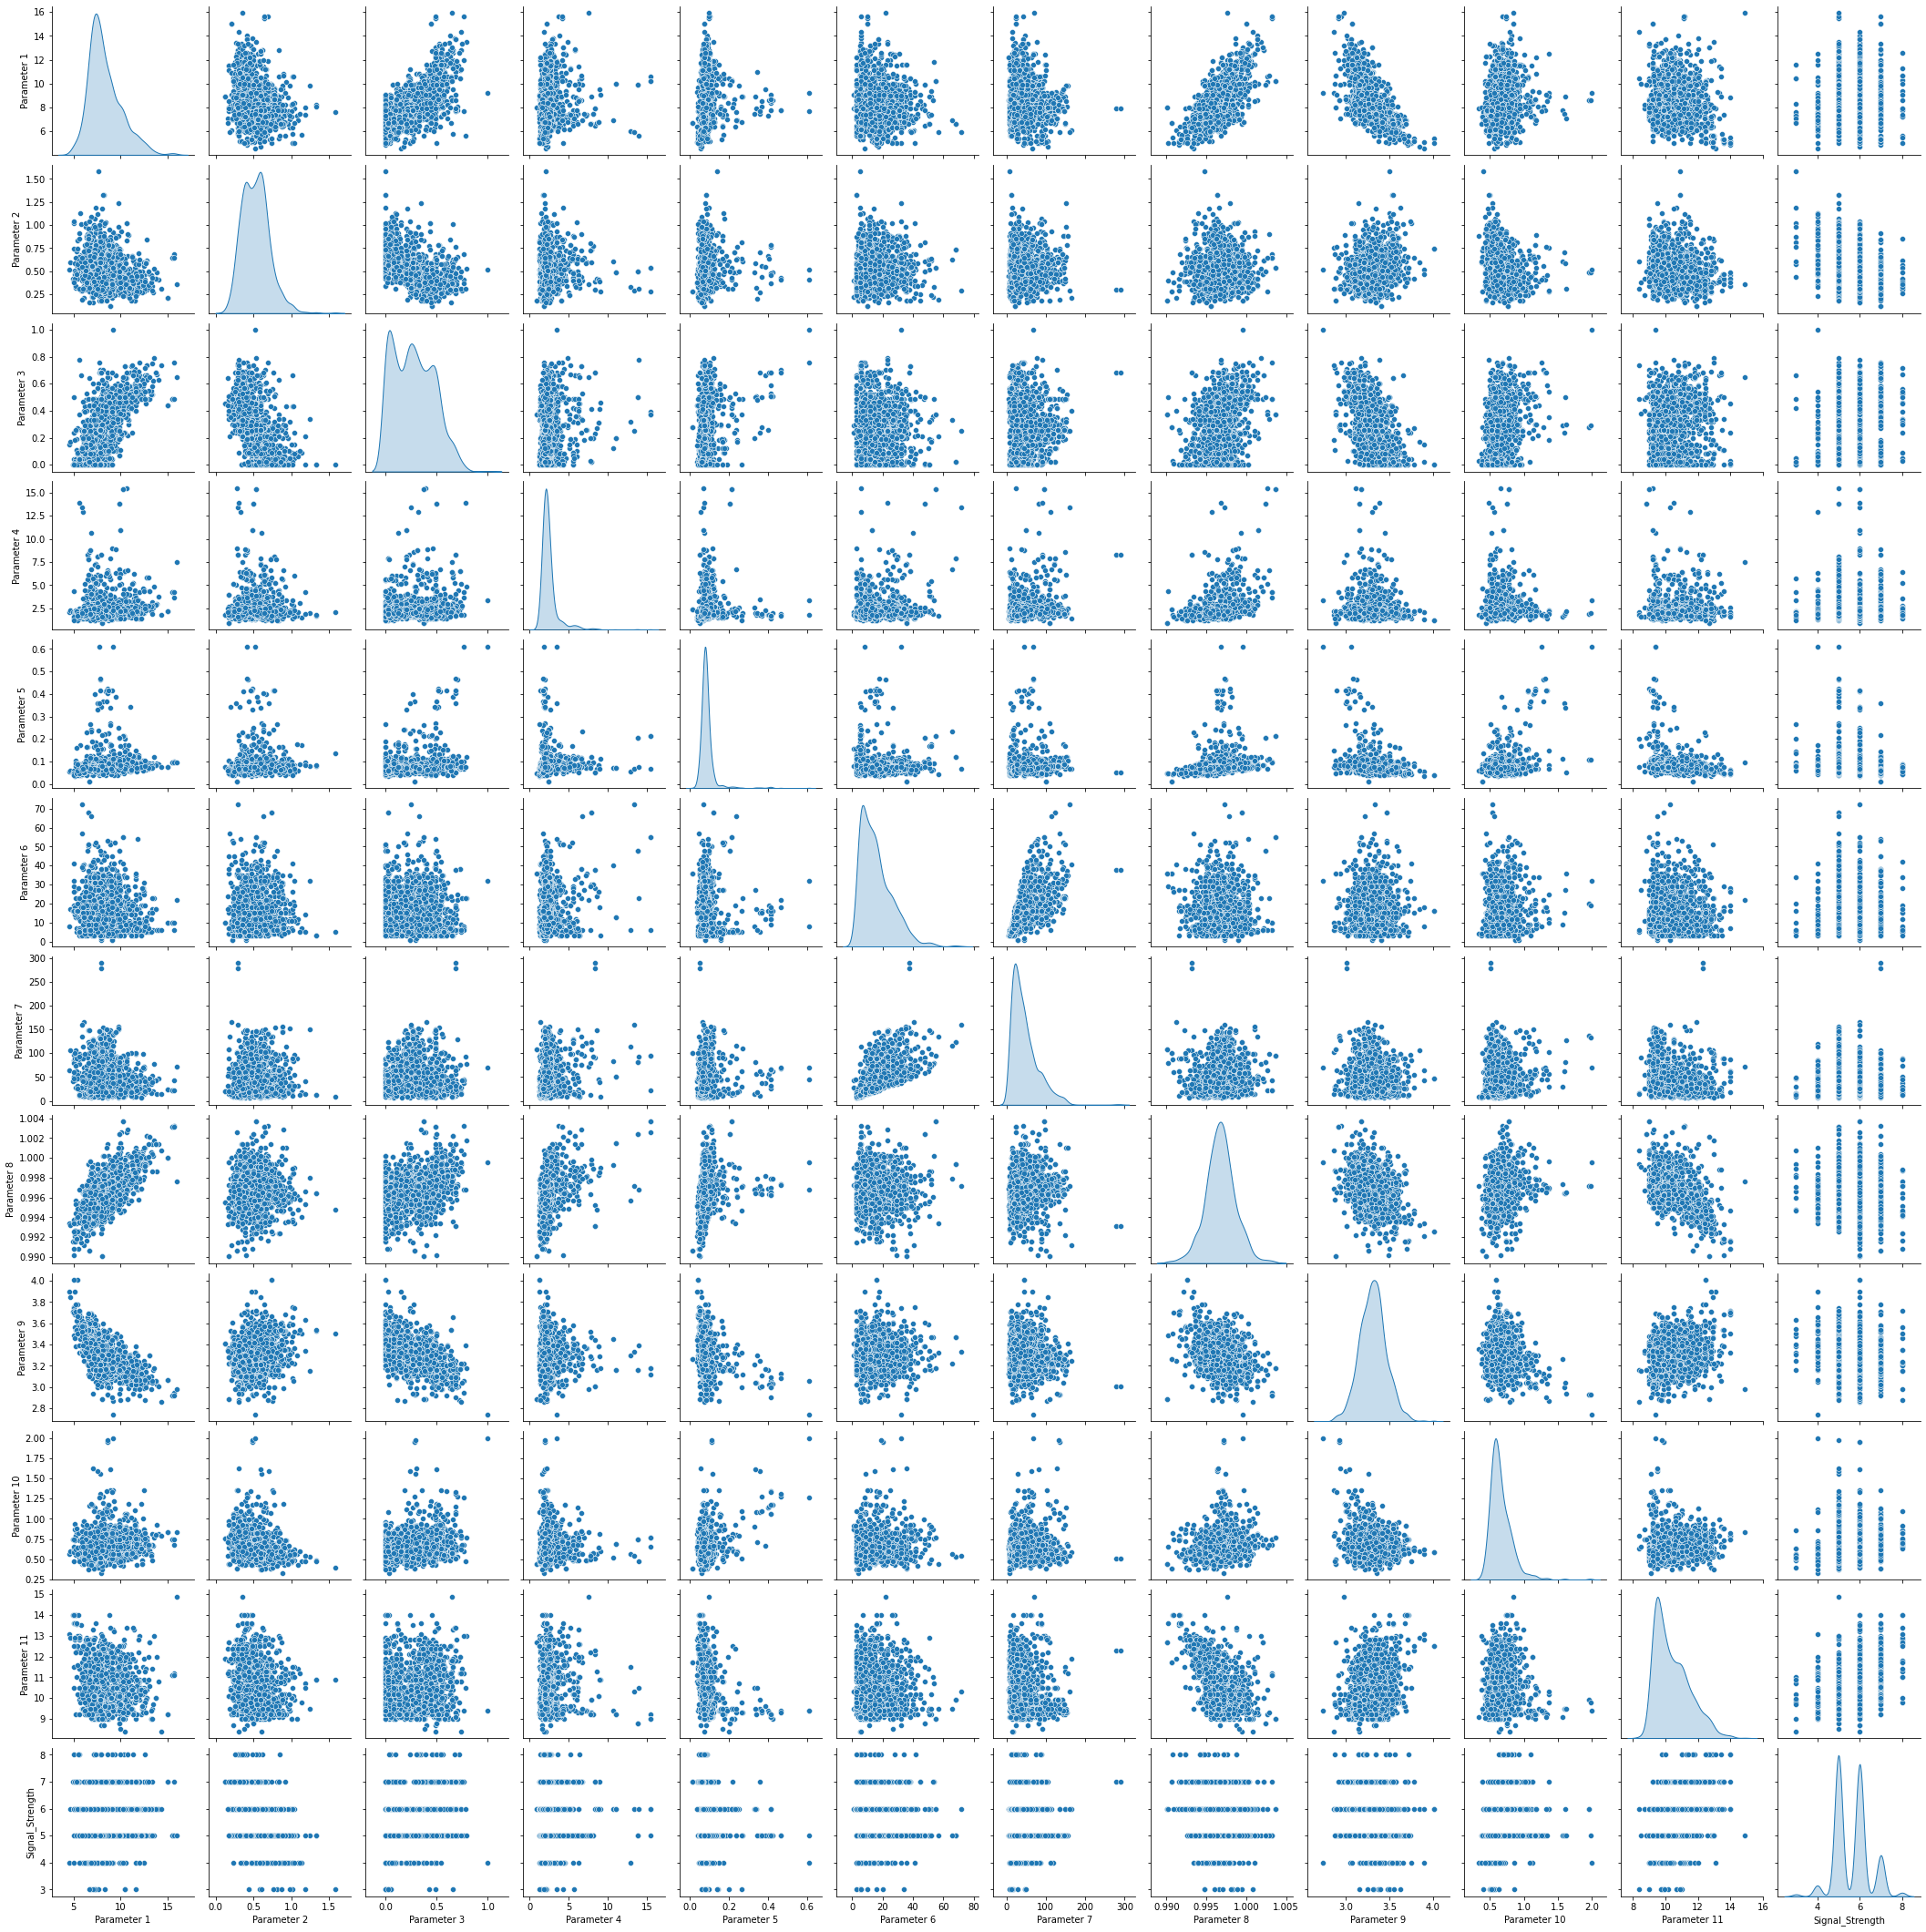

In [66]:
#plt.figure(figsize = (50,50))
sns.pairplot(mydata,diag_kind='kde')
plt.show()

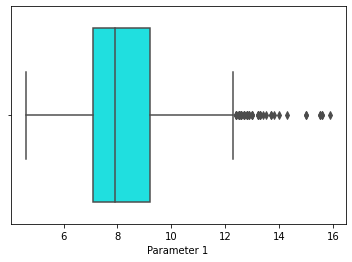

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Lower Whisker, Upper Whisker :  3.95 , 12.349999999999998
Out of  1599  rows in data, number of outliers are: 49


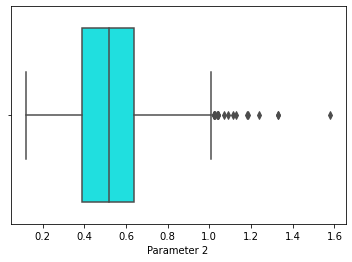

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
Lower Whisker, Upper Whisker :  0.015000000000000013 , 1.0150000000000001
Out of  1599  rows in data, number of outliers are: 19


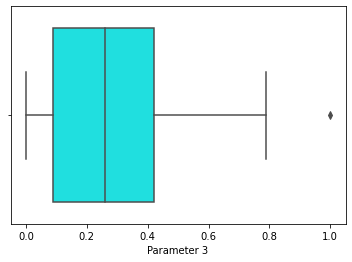

Boxplot of  Parameter 3
Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.42
IQR is: 0.32999999999999996
Lower Whisker, Upper Whisker :  -0.4049999999999999 , 0.9149999999999999
Out of  1599  rows in data, number of outliers are: 1


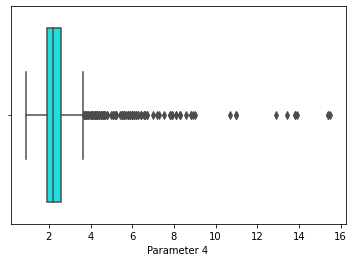

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Lower Whisker, Upper Whisker :  0.8499999999999996 , 3.6500000000000004
Out of  1599  rows in data, number of outliers are: 155


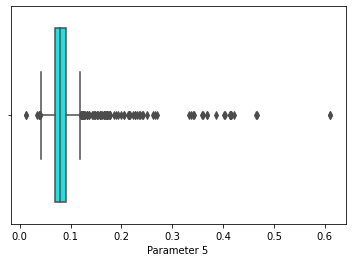

Boxplot of  Parameter 5
Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.09
IQR is: 0.01999999999999999
Lower Whisker, Upper Whisker :  0.04000000000000002 , 0.11999999999999998
Out of  1599  rows in data, number of outliers are: 112


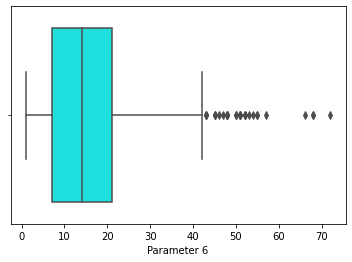

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker, Upper Whisker :  -14.0 , 42.0
Out of  1599  rows in data, number of outliers are: 30


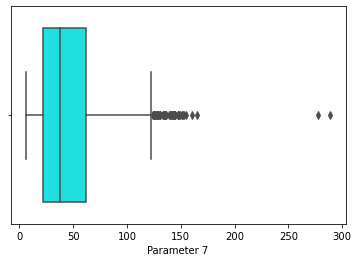

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  62.0
IQR is: 40.0
Lower Whisker, Upper Whisker :  -38.0 , 122.0
Out of  1599  rows in data, number of outliers are: 55


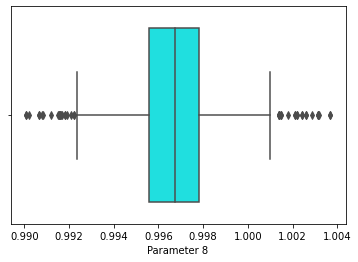

Boxplot of  Parameter 8
Q1 is :  0.9956
Q2 is :  0.99675
Q3 is :  0.997835
IQR is: 0.002234999999999987
Lower Whisker, Upper Whisker :  0.9922475000000001 , 1.0011875
Out of  1599  rows in data, number of outliers are: 45


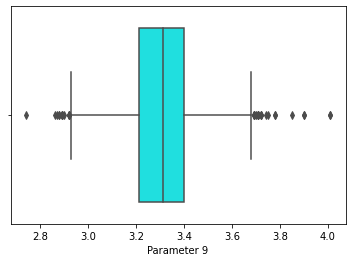

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker, Upper Whisker :  2.925 , 3.6849999999999996
Out of  1599  rows in data, number of outliers are: 35


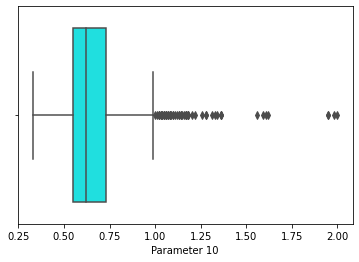

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
Lower Whisker, Upper Whisker :  0.28000000000000014 , 0.9999999999999999
Out of  1599  rows in data, number of outliers are: 59


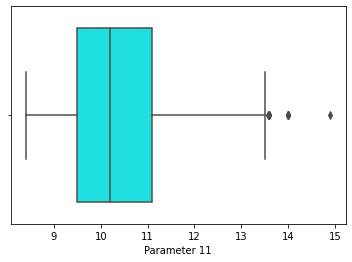

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
Lower Whisker, Upper Whisker :  7.1000000000000005 , 13.5
Out of  1599  rows in data, number of outliers are: 13


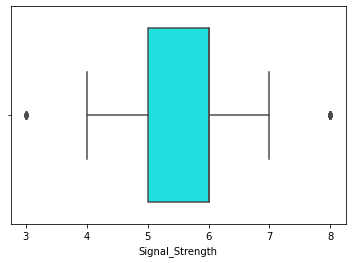

Boxplot of  Signal_Strength
Q1 is :  5.0
Q2 is :  6.0
Q3 is :  6.0
IQR is: 1.0
Lower Whisker, Upper Whisker :  3.5 , 7.5
Out of  1599  rows in data, number of outliers are: 28


In [67]:
# Checking the presence of outliers
l = len(mydata)
col = list(mydata.columns)
#col.remove('condition')
for i in np.arange(len(col)):
    sns.boxplot(x= mydata[col[i]], color='cyan')
    plt.show()
    print('Boxplot of ',col[i])
    #calculating the outiers in attribute 
    Q1 = mydata[col[i]].quantile(0.25)
    Q2 = mydata[col[i]].quantile(0.50)
    Q3 = mydata[col[i]].quantile(0.75) 
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)    
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
    bools = (mydata[col[i]] < (Q1 - 1.5 *IQR)) |(mydata[col[i]] > (Q3 + 1.5 * IQR))
    print('Out of ',l,' rows in data, number of outliers are:',bools.sum())   #calculating the number of outliers

In [68]:
#  function to treat outliers
def detect_treate_outliers(df,operation):
    cols=[]
    IQR_list=[]
    lower_boundary_list=[]
    upper_boundary_list=[]
    outliers_count=[]
    for col in df.columns:
        #print('col',col)
        if((df[col].dtype =='int64' or df[col].dtype =='float64') and (col != 'HR')):
            #print('Inside if')
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (1.5 * IQR)
            upper_boundary = df[col].quantile(0.75) + (1.5 * IQR)
            up_cnt = df[df[col]>upper_boundary][col].shape[0]
            #print('Upper count=',up_cnt)
            lw_cnt = df[df[col]<lower_boundary][col].shape[0]
            #print('lower count=',lw_cnt)
            if(up_cnt+lw_cnt) > 0:
                cols.append(col)
                IQR_list.append(IQR)
                lower_boundary_list.append(lower_boundary)
                upper_boundary_list.append(upper_boundary)
                outliers_count.append(up_cnt+lw_cnt)
                if operation == 'update':
                    df.loc[df[col] > upper_boundary,col] = upper_boundary
                    df.loc[df[col] < lower_boundary,col] = lower_boundary
                else:
                    pass
            else:
                pass
   #print('cols=',cols)
   # print('IQR_list=',IQR_list)
   # print('lower_boundary_list=',lower_boundary_list)
   # print('upper_boundary_list=',upper_boundary_list)
   # print('outliers_count=',outliers_count)
    ndf = pd.DataFrame(list(zip(cols,IQR_list,lower_boundary_list,upper_boundary_list,outliers_count)),columns=['Features','IQR','Lower Boundary','Upper Boundary','Outlier Count'])
    #print('Data=',ndf)
    #print('Columns having outliers=',cols)
    if operation == 'update':
        return (len(cols),df)
    else:
        return (len(cols),ndf)

In [69]:
#Removing outliers by replacing the data below lower whisker with it and above upper whisker with it respectively.
count,df=detect_treate_outliers(mydata,'update')
if count>0:
    print('Updating dataset')
    mydata=df

Updating dataset


<AxesSubplot:>

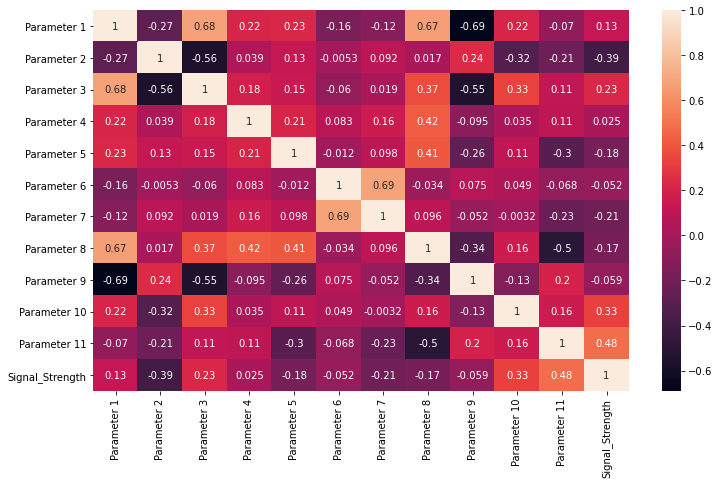

In [70]:
# studying correlation between the attributes
b_corr=mydata.corr()
plt.subplots(figsize =(12, 7)) 
sns.heatmap(b_corr,annot=True)

In [71]:
X = mydata.drop("Signal_Strength", axis=1)
y = mydata['Signal_Strength']

In [72]:
from sklearn.model_selection import train_test_split

# splitting to create test data
X_vtrain, X_test, y_vtrain, y_test = train_test_split(X, y, test_size=.30, random_state=seed)

In [73]:
X_vtrain.shape

(1119, 11)

In [74]:
# splitting to create training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_vtrain, y_vtrain, test_size=.20, random_state=seed)

In [75]:
X_train.shape

(895, 11)

In [80]:

# Initialize Sequential model
model_reg = tf.keras.models.Sequential()

# Normalize input data
model_reg.add(tf.keras.layers.BatchNormalization(input_shape=(11,)))

# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model_reg.add(tf.keras.layers.Dense(1))

In [81]:
# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
model_reg.compile(optimizer='sgd', loss='mse')

In [82]:
model_reg.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100, batch_size=10)

Epoch 1/100
90/90 [==============================] - 0s 2ms/step - loss: 4.6548 - val_loss: 16.4830
Epoch 2/100
90/90 [==============================] - 0s 816us/step - loss: 0.8800 - val_loss: 2.9096
Epoch 3/100
90/90 [==============================] - 0s 801us/step - loss: 0.6661 - val_loss: 0.8851
Epoch 4/100
90/90 [==============================] - 0s 796us/step - loss: 0.5946 - val_loss: 0.5154
Epoch 5/100
90/90 [==============================] - 0s 972us/step - loss: 0.5105 - val_loss: 0.3746
Epoch 6/100
90/90 [==============================] - 0s 988us/step - loss: 0.4865 - val_loss: 0.3550
Epoch 7/100
90/90 [==============================] - 0s 943us/step - loss: 0.4722 - val_loss: 0.3827
Epoch 8/100
90/90 [==============================] - 0s 874us/step - loss: 0.4879 - val_loss: 0.4144
Epoch 9/100
90/90 [==============================] - 0s 863us/step - loss: 0.4706 - val_loss: 0.4344
Epoch 10/100
90/90 [==============================] - 0s 854us/step - loss: 0.4797 - val_los

In [83]:
# save the model
model_reg.save("model_reg.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [84]:
# load the model
model_rr = load_model('model_reg.h5')

In [85]:
y_pred = model_rr.predict(X_test)

In [86]:
print(y_pred[0])
print(y_pred[1])
print(y_pred[2])
print(y_pred[3])
print(y_pred[4])

[5.608073]
[5.6885295]
[5.952709]
[5.3339615]
[5.84976]


In [87]:
print(y_test.head())

1526    6.0
674     6.0
1508    6.0
58      5.0
1351    6.0
Name: Signal_Strength, dtype: float64


In [88]:
score_r = r2_score(y_test,y_pred)
print(score_r)

0.35752962199623617


In [89]:
model_rr.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 11)               44        
 ormalization)                                                   
                                                                 
 dense_30 (Dense)            (None, 1)                 12        
                                                                 
Total params: 56
Trainable params: 34
Non-trainable params: 22
_________________________________________________________________


# Third Approach: Classification Task

In [90]:
# counting the number of classes in output
mydata['Signal_Strength'].value_counts()

5.0    681
6.0    638
7.0    199
4.0     53
7.5     18
3.5     10
Name: Signal_Strength, dtype: int64

In [91]:
yc = to_categorical(y, num_classes=8)

In [92]:
# splitting data for test of categorial 
Xcv_train, Xc_test, ycv_train, yc_test = train_test_split(X, yc, test_size=.30, random_state=seed)

In [93]:
print("Shape of y_train:", ycv_train.shape)
print("One value of y_train:", ycv_train[0])

Shape of y_train: (1119, 8)
One value of y_train: [0. 0. 0. 0. 0. 0. 0. 1.]


In [94]:
# splitting data for  train and validation of categorial 
Xc_train, Xc_val, yc_train, yc_val = train_test_split(Xcv_train, ycv_train, test_size=.20, random_state=seed)

In [95]:
print("Shape of y_train:", yc_train.shape)
print("One value of y_train:", yc_train[0])

Shape of y_train: (895, 8)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0.]


In [96]:
model_class = Sequential()
model_class.add(Dense(11, activation='relu'))
model_class.add(Dense(8, activation='relu'))
model_class.add(Dense(8, activation='softmax'))

In [97]:
# Compile the model
model_class.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model_class.fit(x=Xc_train, y=yc_train, batch_size=20, epochs=100, validation_data=(Xc_val, yc_val))

Epoch 1/100
45/45 [==============================] - 0s 3ms/step - loss: 1.3595 - accuracy: 0.4291 - val_loss: 1.0968 - val_accuracy: 0.4643
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1781 - accuracy: 0.4503 - val_loss: 0.9932 - val_accuracy: 0.4955
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1601 - accuracy: 0.4592 - val_loss: 1.0068 - val_accuracy: 0.5268
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1379 - accuracy: 0.5006 - val_loss: 0.9824 - val_accuracy: 0.5446
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1379 - accuracy: 0.4827 - val_loss: 0.9751 - val_accuracy: 0.5268
Epoch 6/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1255 - accuracy: 0.4939 - val_loss: 1.0126 - val_accuracy: 0.5134
Epoch 7/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1345 - accuracy: 0.4950 - val_loss: 1.0260 - val_accuracy: 0.5268
Epoch 8/100
4

In [98]:
# save the model
model_class.save("model_class.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [99]:
# load the model
model_cl = load_model('model_class.h5')

In [100]:
# calculate score of training data
score = model_cl.evaluate(Xc_train, yc_train, verbose=0)
print(score)

[1.0360441207885742, 0.529608964920044]


In [101]:
# score of test data
score_t = model_cl.evaluate(Xc_test, yc_test, verbose=0)
print( score_t)

[1.0739283561706543, 0.5208333134651184]


In [102]:
#summary of classification model
model_cl.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 11)                132       
                                                                 
 dense_32 (Dense)            (None, 8)                 96        
                                                                 
 dense_33 (Dense)            (None, 8)                 72        
                                                                 
Total params: 300
Trainable params: 300
Non-trainable params: 0
_________________________________________________________________
